In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

#read dataset file and select columns
df = pd.read_excel('maddisonprdata.xlsx')
df = df[['country', 'year', 'rgdpnapc', 'pop']]

#create a list to categorize countries by continent
area = [] 
for value in df['country']: 
    if value == 'Afghanistan' or value == 'China, Hong Kong SAR' or value == 'Singapore' or value == 'India' or value == 'China' or value == 'Armenia' or value == 'Azerbaijan' or value == 'Bangladesh' or value == 'Bahrain': 
        area.append('Asia') 
    elif value == 'Angola' or value == 'Libya' or value == 'South Africa' or value == 'Gabon' or value == 'Niger' or value == 'Egypt' or value == 'Mozambique' or value == 'Burundi' or value == 'Benin' or value == 'Burkina Faso' or value == 'D.R. of the Congo' or value == 'Botswana': 
        area.append('Africa') 
    elif value == 'Albania' or value == 'Greece' or value == 'United Kingdom' or value == 'France' or value == 'Spain' or value == 'Ireland' or value == 'Germany' or value == 'Austria' or value == 'Switzerland' or value == 'Belgium' or value == 'Bulgaria' or value == 'Belarus' or value == 'Bosnia and Herzegovina':
        area.append('Europe')
    elif value == 'United Arab Emirates' or value == 'Iraq' or value == 'Saudi Arabia' or value == 'Qatar' or value == 'Oman' or value == 'Kuwait':
        area.append('Middle East')
    elif value == 'Argentina' or value == 'Peru' or value == 'Uruguay' or value == 'Mexico' or value == 'United States' or value == 'Canada' or value == 'Bolivia (Plurinational State of)' or value == 'Brazil':
        area.append('America')
    elif value == 'Australia' or value == 'New Zealand':
        area.append('Oceania')
    else: 
        area.append('Europe') 
df['area'] = area
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df["year"] = df["year"].astype(int)


In [2]:
#sort values by year 
dff = (df[df['year'] == 1974].sort_values(by='rgdpnapc', ascending=False).head(15))
dff

,country,year,rgdpnapc,pop,area
15396,Qatar,1974,412705.0,157.0,Middle East
9895,Kuwait,1974,141662.0,948.0,Middle East
15757,Saudi Arabia,1974,59164.0,6868.0,Middle East
2607,Switzerland,1974,42963.0,6460.0,Europe
1609,Bahrain,1974,39850.0,248.0,Asia
12848,Norway,1974,35332.0,3985.0,Europe
10175,Libya,1974,33238.0,2451.0,Africa
8679,Iraq,1974,26757.0,10754.0,Middle East
18918,United States,1974,26287.0,213854.0,America
4663,Denmark,1974,24708.0,5045.0,Europe


<BarContainer object of 15 artists>

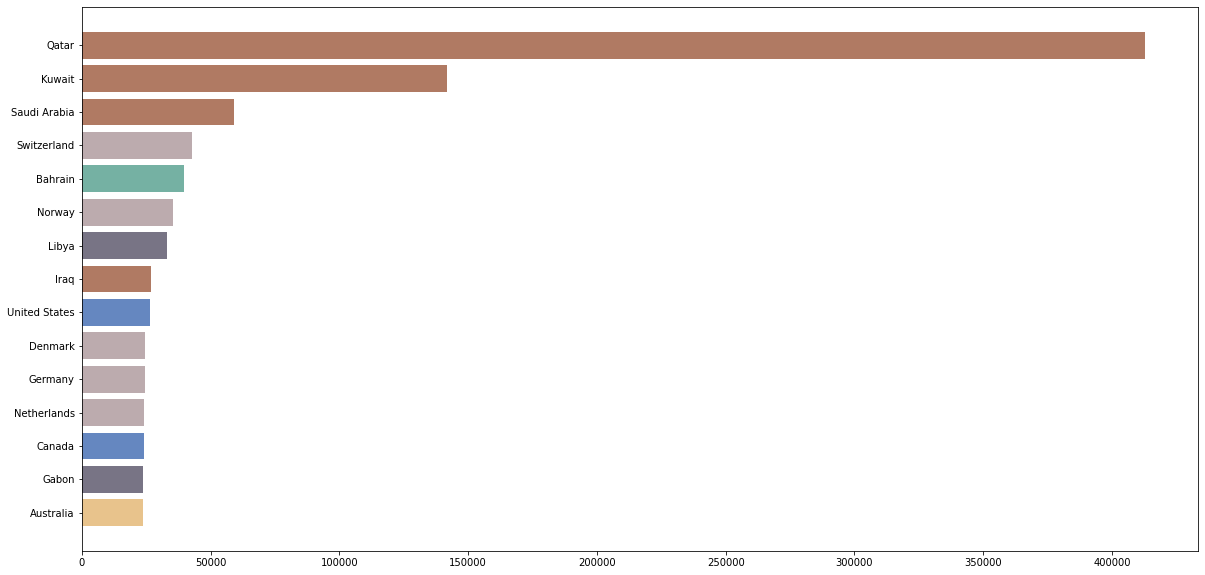

In [37]:
#create figure
fig, ax = plt.subplots(figsize=(20,10))
dff = dff[::-1]

#associate each area with a color by creating a dictionary 
colors = dict(zip(['Europe', 'Africa', 'Asia', 'Oceania', 'America', 'Middle East'],['#bcabae', '#787485', '#75b1a3','#e8c38c','#6587c0', '#b07a63']))

#map areas to countries to later add colors to bars based on the world's area.
group_cls = df.set_index('country')['area'].to_dict()
ax.barh(dff['country'], dff['rgdpnapc'], color=[colors[group_cls[x]] for x in dff['country']])

#flag = mpimg.imread('flag.png')
#imagebox = OffsetImage(flag, zoom=0.2)
#ab = AnnotationBbox(imagebox, (0.4, 0.6))
#ax.add_artist(ab)


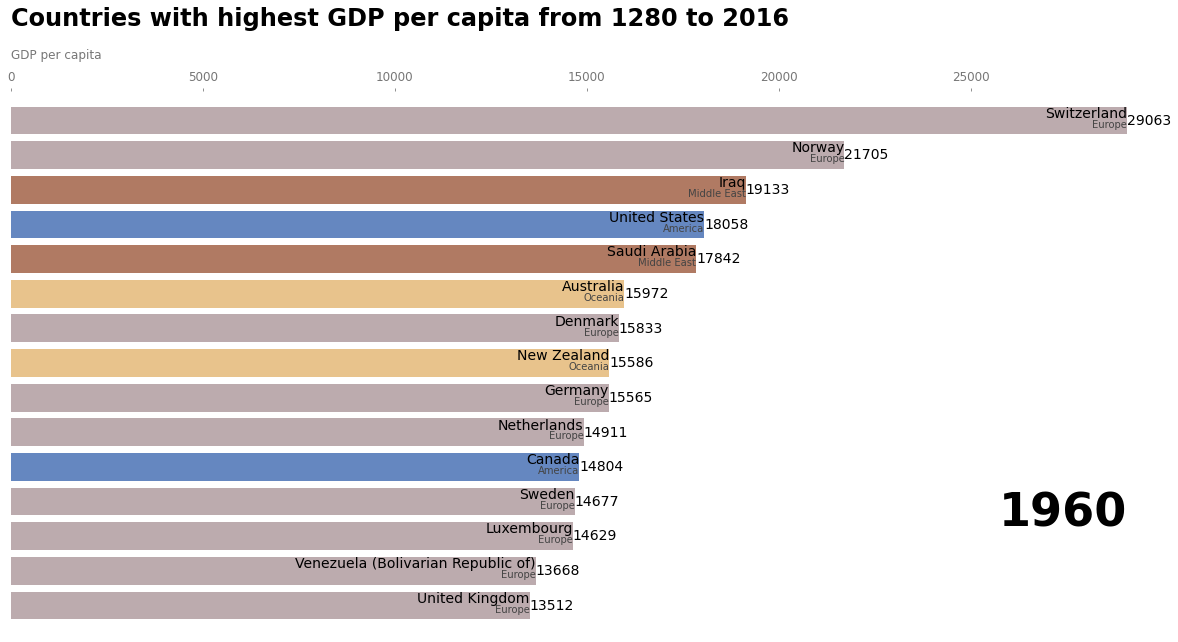

In [41]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(20,10))
flag = plt.imread('flag.png')

#add characteristics, legend 
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='rgdpnapc', ascending=True).tail(15)
    ax.clear()
    ax.barh(dff['country'], dff['rgdpnapc'], height=0.8, color=[colors[group_cls[x]] for x in dff['country']])
    #iterate over values to plot labels and values
    for i, (rgdpnapc, country) in enumerate(zip(dff['rgdpnapc'], dff['country'])):
        ax.text(rgdpnapc, i, country, ha='right', size=14, weight=500, va='bottom')  # Liberia: country
        ax.text(rgdpnapc, i-0.2, group_cls[country],  ha='right', va='baseline', size=10, color='#444444')  # Asia: area name
        ax.text(rgdpnapc, i, int(rgdpnapc), ha='left', size=14, va='center')   # 38194.2: GDP value
    ax.xaxis.set_ticks_position('top')
    ax.set_axisbelow(True)
    #Add year on the right side in the middle
    ax.text(1, 0.2, year, transform=ax.transAxes, size=46, ha='right', weight=800)
    #Add legends
    ax.text(0, 1.06, 'GDP per capita', transform=ax.transAxes, size=12, color='#777777')
    ax.margins(0, 0.03)
    ax.text(0, 1.12, 'Countries with highest GDP per capita from 1280 to 2016',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    plt.box(False)

draw_barchart(1960)

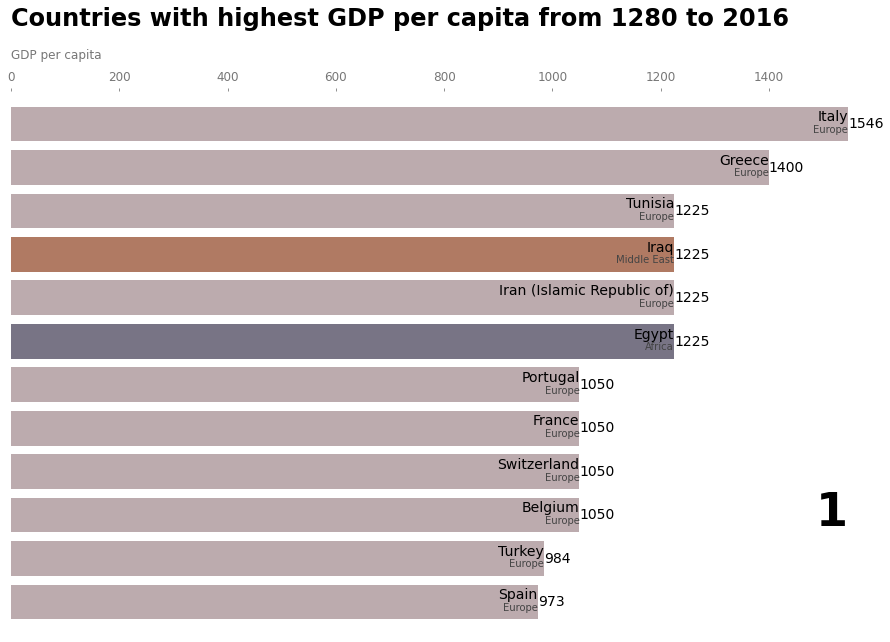

In [42]:
#create the mp4 file with the bar chart 
plt.rcParams['animation.ffmpeg_path'] = '/Users/auroremasson/Desktop/ffmpeg'

fig, ax = plt.subplots(figsize=(15, 10))
anim = animation.FuncAnimation(fig, draw_barchart, frames=sorted(df.year.unique()), interval=30)
'''
#for a gif creation:
f = r"/Users/auroremasson/Desktop/animation.gif" 
writergif = animation.PillowWriter(fps=60) 
anim.save(f, writer=writergif)
'''
f = r"/Users/auroremasson/Desktop/animation.mp4" 
writervideo = animation.FFMpegWriter(fps=5) 
anim.save(f, writer=writervideo)
